# TensorFlow Basics

## What we'll be covering ?
- Creating simple constants with TF.
- Creating a TF session in order to run TF operations.

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


## Simple Constants

Let's show how to create a simple constant with Tensorflow, which TF stores as a tensor object:

In [3]:
tf.constant("Hello World")

<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
hello = tf.constant("Hello World") # Saving as a variable

In [5]:
type(hello) # Shows that it is a tensor object

tensorflow.python.framework.ops.Tensor

In [6]:
# Another example
x = tf.constant(100)

In [7]:
x # Tells the data type

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [8]:
type(x) # Tells it is a tensor object

tensorflow.python.framework.ops.Tensor

### Running Sessions

Now you can create a TensorFlow Session, which is a class for running TensorFlow operations.

A `Session` object encapsulates the environment in which `Operation`
objects are executed, and `Tensor` objects are evaluated in those operations. For example:

In [9]:
sess = tf.Session()

In [10]:
sess.run(hello) # We can pass in tensor constants like string tensor constant hello into it, which gives us output.

b'Hello World'

In [11]:
sess.run(x)

100

In [12]:
type(sess.run(x)) # Notice how here we get back type as numpy.int32

numpy.int32

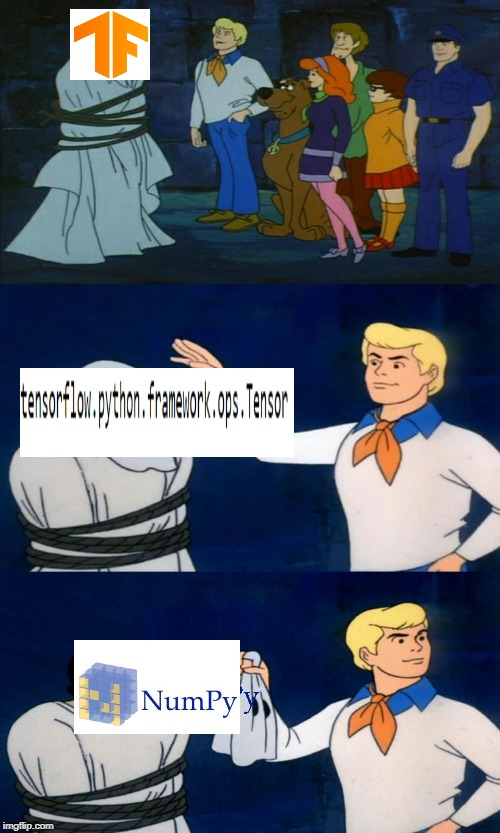

## Operations

You can line up multiple Tensorflow operations in to be run during a session:

In [13]:
x = tf.constant(2)
y = tf.constant(3)

In [14]:
with tf.Session() as sess: # Do a bunch of operations
    print('Operations with Constants : \n')
    print('Addition : ',sess.run(x+y)) #Grabbing 2 constants and putting them inside session.run() command
    print('Subtraction : ',sess.run(x-y))
    print('Multiplication : ',sess.run(x*y))
    print('Division : ',sess.run(x/y))

Operations with Constants : 

Addition :  5
Subtraction :  -1
Multiplication :  6
Division :  0.6666666666666666


### Placeholder

You may not always have the constants right away, and you may be waiting for a constant to appear after a cycle of operations. **tf.placeholder** is a tool for this. It inserts a placeholder for a tensor that will be always fed.

**Important**: This tensor will produce an error if evaluated. Its value must be fed using the `feed_dict` optional argument to `Session.run()`,
`Tensor.eval()`, or `Operation.run()`. For example, for a placeholder of a matrix of floating point numbers:

    x = tf.placeholder(tf.float32, shape=(1024, 1024))

Here is an example for integer placeholders:

In [15]:
x = tf.placeholder(tf.int32) # Place the accepted value type here, like int, float etc. but not 3, 5.6 etc.
y = tf.placeholder(tf.int32)

In [16]:
x # See how it says that it is a placeholder of unknown shape, but expects a data type of int32.
# For constant we provide some sort of array, string, value etc. but for placeholder we specify dtype.

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [17]:
type(x)

tensorflow.python.framework.ops.Tensor

- Now that we have defined placeholder, now we can define operations that can have variable input of pre-defined dtypes.
- Previously, we had operations which needed some sort of constant input as we were using basic sess.run().


### Defining Operations

In [18]:
add = tf.add(x,y) # Built-in operation that takes in x and y, similar to function in python with different formating.
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

Running operations with variable input:

In [19]:
d = {x:45,y:90000} # Making a dictionary for easy passing-in

In [20]:
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition',sess.run(add,feed_dict=d))
    print('Subtraction',sess.run(sub,feed_dict=d))
    print('Multiplication',sess.run(mul,feed_dict=d))

Operations with Constants
Addition 90045
Subtraction -89955
Multiplication 4050000


Now let's see an example of a more complex operation, using Matrix Multiplication. First we need to create the matrices:

In [21]:
import numpy as np
# Make sure to use floats here, int64 will cause an error.
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [22]:
a

array([[5., 5.]])

In [23]:
a.shape # 1 row, 2 columns

(1, 2)

In [24]:
b # 2 rows, 1 column. 
# REMEMBER : Matrix multiplication only happens for matrices of m x n and n x p shape of m x p shape as output.

array([[2.],
       [2.]])

In [25]:
b.shape

(2, 1)

In [26]:
mat1 = tf.constant(a)

In [27]:
mat2 = tf.constant(b)

The matrix multiplication operation:

In [28]:
matrix_multi = tf.matmul(mat1,mat2)

Now run the session to perform the Operation:

In [29]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

# Output being one row one column

[[20.]]
